# **Epileptic Seizure Classification**

**Dataset:** Epileptic Seizure Recognition dataset available at https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

**Code:** Chapter 3 Classification from `Hands-On Machine Learning with Scikit-Learn and TensorFlow` book (Aurélien Géron)

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

Predict the `y` class = {1, 2, 3, 4, 5} 

### Dataset attributes as described on UCI:
The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

In [2]:
EPILEPTIC_SEIZURE_PATH = "dataset"

def load_epileptic_seizure_data(epileptic_seizure_path=EPILEPTIC_SEIZURE_PATH):
    csv_path = os.path.join(epileptic_seizure_path, "data.csv")
    return pd.read_csv(csv_path)

In [3]:
epileptic_seizure = load_epileptic_seizure_data()
epileptic_seizure.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Give a name to the first column, as it is unnamed:

In [4]:
epileptic_seizure.rename( columns={'Unnamed: 0':'ID'}, inplace=True )

In [5]:
epileptic_seizure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, ID to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [6]:
epileptic_seizure["y"].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [7]:
epileptic_seizure.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


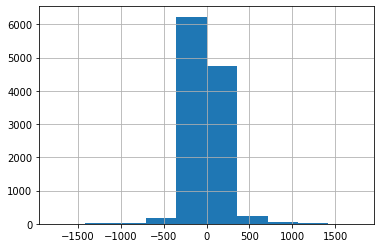

In [8]:
epileptic_seizure["X55"].hist()

## Data visualization

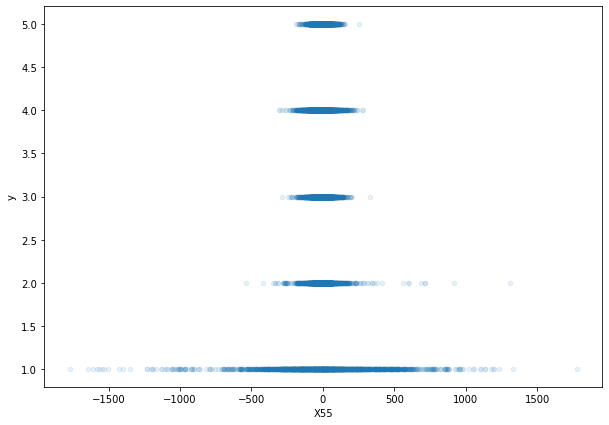

In [9]:
epileptic_seizure.plot(kind="scatter", x="X55", y="y", figsize=(10,7), alpha=0.1)
plt.show()

Drop the `ID` attribute, as it is the ID of the record:

In [10]:
epileptic_seizure = epileptic_seizure.drop("ID", axis=1)

In [11]:
corr_matrix = epileptic_seizure.corr()

In [12]:
corr_matrix["y"].sort_values(ascending=False)

y       1.000000
X173    0.029172
X174    0.028563
X175    0.028425
X176    0.027259
          ...   
X158   -0.034805
X12    -0.035379
X11    -0.038056
X43    -0.038320
X44    -0.040499
Name: y, Length: 179, dtype: float64

**No correlation !**

### Split the data in training and test sets

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(epileptic_seizure, test_size=0.2, random_state=42)

In [14]:
test_set.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
5556,-5,-13,-4,3,4,4,12,28,45,58,...,-54,-64,-49,-34,-17,-18,-10,-10,-15,5
1570,-39,-32,-21,-14,-9,8,38,67,89,87,...,-14,-71,-123,-143,-154,-129,-94,-46,1,4
2582,115,106,39,-4,-10,-10,-22,-20,1,6,...,-55,-29,-14,-18,-29,-29,-15,-20,-10,4
4948,-6,-14,-25,-24,-10,9,26,54,61,64,...,-7,-24,-9,32,65,97,100,88,80,5
7089,59,56,71,58,66,52,34,17,-2,0,...,-29,3,38,62,65,40,18,5,-6,5


# Data preparation

In [15]:
X_train = train_set.drop("y", axis=1) # drop labels for training set
y_train = train_set["y"].copy()

In [16]:
X_test = test_set.drop("y", axis=1) # drop labels for training set
y_test = test_set["y"].copy()

Shuffle the training data:

In [17]:
shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

Expecting no incomplete rows, and **no imputation** later in the pipeline:

In [18]:
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_prepared = num_pipeline.fit_transform(X_train)

In [20]:
X_train_prepared

array([[-0.06680049,  0.03184878,  0.22650231, ...,  0.4175809 ,
         0.4567377 ,  0.53786168],
       [ 0.06094484,  0.01355136,  0.0099789 , ...,  0.16183686,
         0.12030471,  0.06624415],
       [-0.10938227, -0.11453057, -0.03951216, ...,  0.02178656,
        -0.10602293, -0.19712667],
       ...,
       [-0.90626983, -1.34045762, -1.344839  , ..., -0.18524433,
        -0.17942649,  0.1581177 ],
       [ 0.57800929,  0.59296962,  0.61624445, ..., -0.50796894,
        -0.41798806, -0.39924847],
       [-0.7785245 , -0.72444453, -0.66433685, ..., -0.13653118,
        -0.09990597, -0.09912822]])

In [21]:
X_train_prepared.shape

(9200, 178)

# Binary Classification

The seizure is represented by the class 1. Start with a binary classfier to classify seizure vs. non-seizure.

In [22]:
y_train_seizure = (y_train == 1)
y_test_seizure = (y_test == 1)

In [23]:
y_train_seizure.value_counts()

False    7365
True     1835
Name: y, dtype: int64

Train a `Stochastic Gradient Descent (SGD) Classifier`:

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train_seizure)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
some_data = X_train.iloc[55]

sgd_clf.predict([some_data])

array([ True])

In [26]:
y_train_seizure[55]

False

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_seizure, cv=3)

**Confusion matrix**:

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train_seizure, y_train_predict)

array([[5576, 1789],
       [ 951,  884]], dtype=int64)

In [29]:
precision_score(y_train_seizure, y_train_predict)

0.33071455293677515

In [30]:
recall_score(y_train_seizure, y_train_predict)

0.4817438692098093

In [31]:
f1_score(y_train_seizure, y_train_predict)

0.39219165927240457

*All 3 scores are under 50%!*

**Recall vs. Precision**

In [32]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_seizure, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_seizure, y_scores)

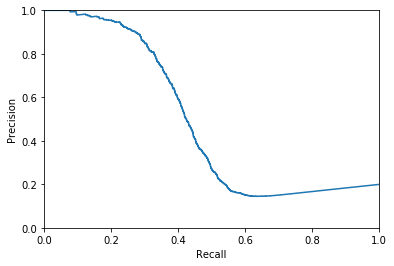

In [33]:
plt.plot(recalls, precisions, label=None)
plt.axis([0, 1, 0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

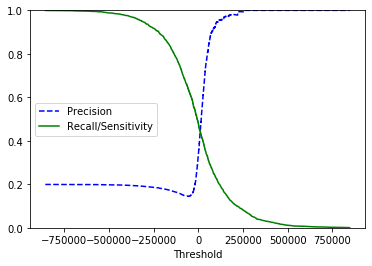

In [34]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall/Sensitivity")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])
plt.show()

**ROC Curve**:

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_seizure, y_scores)

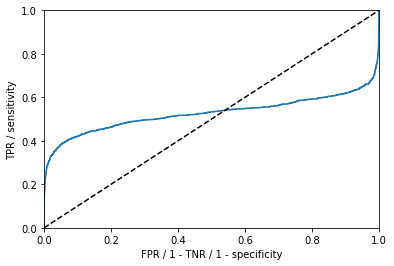

In [36]:
plt.plot(fpr, tpr, label=None)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR / 1 - TNR / 1 - specificity")
plt.ylabel("TPR / sensitivity")
plt.show()

This model is not performant, try instead a `Random Forest Classifier`:

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_prepared, y_train_seizure)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(forest_clf, X_train, y_train_seizure, cv=3)

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train_seizure, y_train_predict)

array([[7248,  117],
       [ 142, 1693]], dtype=int64)

In [40]:
precision_score(y_train_seizure, y_train_predict)

0.9353591160220994

In [41]:
recall_score(y_train_seizure, y_train_predict)

0.9226158038147139

In [42]:
f1_score(y_train_seizure, y_train_predict)

0.9289437585733882

The performance of this model is much better!

In [43]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(forest_clf, X_train, y_train_seizure, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train_seizure, y_scores)

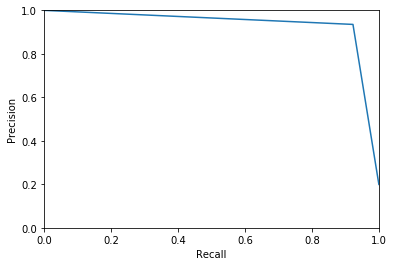

In [44]:
plt.plot(recalls, precisions, label=None)
plt.axis([0, 1, 0, 1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

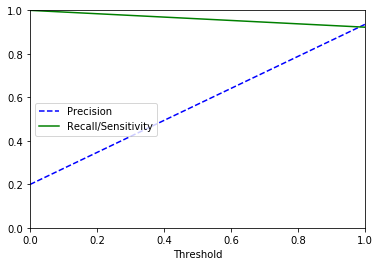

In [45]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall/Sensitivity")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train_seizure, y_scores)

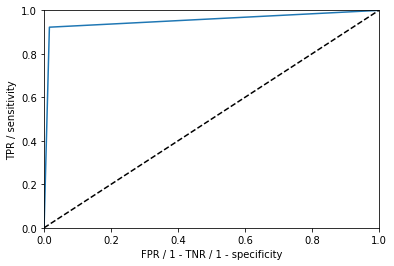

In [47]:
plt.plot(fpr, tpr, label=None)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR / 1 - TNR / 1 - specificity")
plt.ylabel("TPR / sensitivity")
plt.show()

In [48]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9533649283839354

# Multiclass Classification

Use the original prepared X training.

Use a **Random Forest Classifier** that can directly classify into multiple classes, without using One versus One or One versus Rest strategy:

In [49]:
forest_clf = RandomForestClassifier(random_state=42)
epileptic_seizure_predicted = cross_val_predict(forest_clf, X_train_prepared, 
                                    y_train, cv=3,
                                    method="predict_proba")

In [50]:
epileptic_seizure_predicted.shape

(9200, 5)

Fit the training set on the classifier:

In [51]:
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
some_data = X_train_prepared[55]

forest_clf.predict_proba([some_data])

array([[0.08, 0.79, 0.04, 0.05, 0.04]])

Actual `y` value:

In [53]:
y_train[55]

5

**Cross validation**

In [54]:
y_train_predicted = cross_val_predict(forest_clf, X_train, y_train, cv=3)

**ROC Curves for all classes**

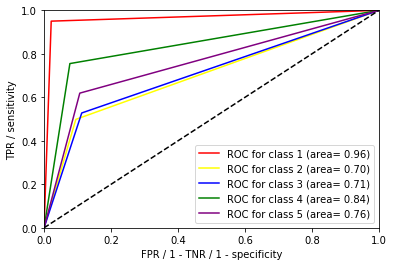

In [55]:
n_classes = 5
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_train_i = (y_train == i+1)
    y_train_predicted_i = (y_train_predicted == i+1)
    fpr[i], tpr[i], _ = roc_curve(y_train_i, y_train_predicted_i)
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['red', 'yellow', 'blue', 'green', 'purple']

plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label="ROC for class {0} (area= {1:0.2f})"
            ''.format(i+1, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR / 1 - TNR / 1 - specificity")
plt.ylabel("TPR / sensitivity")
plt.legend(loc="lower right")

plt.show()

**Confusion matrix:**

In [56]:
conf_matrix = confusion_matrix(y_train, y_train_predicted)
conf_matrix

array([[1744,   18,   19,   54,    0],
       [ 104,  918,  536,   80,  203],
       [  44,  500,  977,  110,  219],
       [   9,   36,   42, 1392,  364],
       [   0,  144,  230,  323, 1134]], dtype=int64)

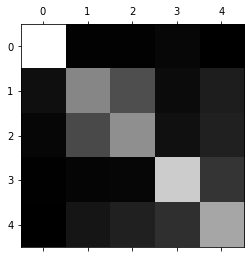

In [57]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

Class 0 = seizure is best classfied, but the classe 2 is 25% misclassified as class 3 and the class 3 is 20% misclassified as class 2.

In [58]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

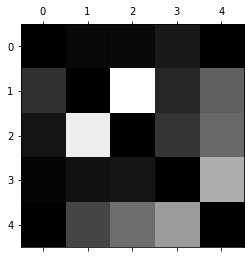

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**Predict pipeline**

In [60]:
predict_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('forest_clf', forest_clf)
])

In [61]:
predict_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preparation',
                 Pipeline(memory=None,
                          steps=[('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('forest_clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10

**Some predictions with test data:**

In [62]:
X_testing = test_set.drop("y", axis=1) # drop labels for training set
y_labels = test_set["y"].copy()

In [63]:
some_data = X_test.iloc[:15]
some_labels = y_test.iloc[:15]

print("Predictions:\t", list(predict_pipeline.predict(some_data)))
print("Labels:\t\t", list(some_labels))

Predictions:	 [3, 4, 4, 5, 5, 2, 3, 2, 5, 1, 3, 5, 5, 1, 5]
Labels:		 [5, 4, 4, 5, 5, 2, 2, 3, 5, 1, 3, 5, 2, 1, 4]
